<a href="https://colab.research.google.com/github/adityachoudharyclg/internshipProjectClg/blob/master/lfr_0_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torch.nn.functional as F

import networkx as nx
from sklearn.cluster import KMeans
from sklearn import metrics
import re

In [ ]:
!wget https://github.com/adityachoudharyclg/internshipProjectClg/archive/master.zip

--2020-07-09 14:03:45--  https://github.com/adityachoudharyclg/internshipProjectClg/archive/master.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/adityachoudharyclg/internshipProjectClg/zip/master [following]
--2020-07-09 14:03:46--  https://codeload.github.com/adityachoudharyclg/internshipProjectClg/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip.1’

master.zip.1            [   <=>              ] 226.95K   314KB/s    in 0.7s    

2020-07-09 14:03:48 (314 KB/s) - ‘master.zip.1’ saved [232401]



In [ ]:
!unzip master.zip

Archive:  master.zip
1162fe61951dca48e3f549a5f098b3e926bad09d
replace internshipProjectClg-master/.gitattributes? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace internshipProjectClg-master/AdjNoun/adjnoun.gml? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
data=[(1, 5), (1, 12), (1, 15), (1, 17), (1, 35), (1, 39), (1, 45), (1, 48), (1, 52), (1, 59), (1, 68), (1, 83), (1, 89), (1, 101), (1, 115), (1, 118), (2, 20), (2, 22), (2, 36), (2, 40), (2, 44), (2, 51), (2, 57), (2, 65), (2, 75), (2, 76), (2, 77), (2, 79), (2, 83), (2, 92), (2, 125), (2, 126), (3, 10), (3, 12), (3, 29), (3, 33), (3, 36), (3, 43), (3, 44), (3, 63), (3, 67), (3, 68), (3, 77), (3, 79), (3, 97), (3, 110), (3, 117), (3, 119), (4, 5), (4, 8), (4, 9), (4, 10), (4, 17), (4, 45), (4, 50), (4, 61), (4, 71), (4, 77), (4, 93), (4, 99), (4, 101), (4, 104), (4, 109), (4, 115), (5, 45), (5, 52), (5, 53), (5, 71), (5, 73), (5, 84), (5, 86), (5, 87), (5, 89), (5, 98), (5, 100), (5, 105), (5, 113), (5, 118), (6, 15), (6, 31), (6, 33), (6, 45), (6, 52), (6, 53), (6, 66), (6, 73), (6, 76), (6, 88), (6, 89), (6, 99), (6, 101), (6, 111), (6, 117), (6, 118), (7, 13), (7, 25), (7, 27), (7, 32), (7, 35), (7, 61), (7, 70), (7, 95), (7, 102), (7, 106), (7, 108), (7, 109), (7, 112), (7, 113), (7, 119), (7, 127), (8, 23), (8, 28), (8, 43), (8, 64), (8, 66), (8, 67), (8, 68), (8, 71), (8, 72), (8, 75), (8, 97), (8, 105), (8, 107), (8, 110), (8, 117), (9, 16), (9, 18), (9, 32), (9, 54), (9, 69), (9, 74), (9, 82), (9, 90), (9, 91), (9, 100), (9, 102), (9, 114), (9, 121), (9, 122), (9, 124), (10, 23), (10, 24), (10, 26), (10, 33), (10, 34), (10, 41), (10, 43), (10, 46), (10, 56), (10, 78), (10, 82), (10, 91), (10, 105), (10, 107), (11, 20), (11, 21), (11, 26), (11, 29), (11, 33), (11, 39), (11, 40), (11, 53), (11, 55), (11, 64), (11, 69), (11, 75), (11, 81), (11, 103), (11, 107), (11, 118), (12, 16), (12, 20), (12, 29), (12, 39), (12, 55), (12, 56), (12, 65), (12, 71), (12, 74), (12, 78), (12, 81), (12, 82), (12, 88), (12, 117), (13, 17), (13, 18), (13, 27), (13, 30), (13, 47), (13, 48), (13, 54), (13, 70), (13, 90), (13, 96), (13, 97), (13, 113), (13, 121), (13, 122), (13, 124), (14, 22), (14, 37), (14, 48), (14, 49), (14, 57), (14, 59), (14, 60), (14, 69), (14, 76), (14, 78), (14, 91), (14, 99), (14, 103), (14, 112), (14, 120), (14, 128), (15, 16), (15, 19), (15, 23), (15, 25), (15, 38), (15, 47), (15, 73), (15, 99), (15, 101), (15, 109), (15, 111), (15, 115), (15, 116), (15, 118), (16, 27), (16, 42), (16, 45), (16, 52), (16, 58), (16, 59), (16, 70), (16, 73), (16, 87), (16, 88), (16, 89), (16, 105), (16, 115), (17, 53), (17, 58), (17, 59), (17, 69), (17, 73), (17, 77), (17, 94), (17, 96), (17, 105), (17, 111), (17, 112), (17, 118), (17, 123), (18, 25), (18, 28), (18, 48), (18, 54), (18, 67), (18, 72), (18, 74), (18, 91), (18, 95), (18, 108), (18, 121), (18, 122), (18, 123), (18, 127), (19, 25), (19, 50), (19, 52), (19, 58), (19, 59), (19, 61), (19, 76), (19, 77), (19, 87), (19, 92), (19, 105), (19, 115), (19, 116), (19, 119), (19, 123), (20, 23), (20, 25), (20, 26), (20, 28), (20, 36), (20, 39), (20, 55), (20, 56), (20, 74), (20, 78), (20, 81), (20, 97), (20, 117), (21, 29), (21, 32), (21, 33), (21, 36), (21, 46), (21, 64), (21, 68), (21, 78), (21, 81), (21, 82), (21, 85), (21, 96), (21, 110), (21, 122), (21, 128), (22, 39), (22, 49), (22, 54), (22, 60), (22, 62), (22, 70), (22, 89), (22, 92), (22, 96), (22, 103), (22, 106), (22, 114), (22, 119), (22, 128), (23, 28), (23, 34), (23, 39), (23, 43), (23, 55), (23, 60), (23, 75), (23, 82), (23, 85), (23, 96), (23, 109), (23, 117), (24, 31), (24, 37), (24, 41), (24, 51), (24, 66), (24, 76), (24, 85), (24, 86), (24, 87), (24, 92), (24, 94), (24, 103), (24, 107), (24, 126), (24, 128), (25, 42), (25, 47), (25, 55), (25, 61), (25, 70), (25, 72), (25, 79), (25, 90), (25, 102), (25, 126), (25, 127), (26, 29), (26, 40), (26, 62), (26, 67), (26, 75), (26, 76), (26, 78), (26, 97), (26, 98), (26, 107), (26, 110), (26, 115), (26, 117), (27, 29), (27, 35), (27, 38), (27, 42), (27, 47), (27, 58), (27, 64), (27, 79), (27, 84), (27, 86), (27, 90), (27, 102), (27, 127), (28, 43), (28, 46), (28, 55), (28, 65), (28, 68), (28, 82), (28, 83), (28, 96), (28, 99), (28, 107), (28, 110), (28, 124), (29, 34), (29, 39), (29, 42), (29, 43), (29, 65), (29, 67), (29, 75), (29, 120), (29, 122), (29, 125), (30, 40), (30, 44), (30, 62), (30, 68), (30, 85), (30, 86), (30, 89), (30, 94), (30, 102), (30, 104), (30, 112), (30, 114), (30, 120), (30, 126), (30, 128), (31, 32), (31, 36), (31, 40), (31, 50), (31, 51), (31, 57), (31, 66), (31, 69), (31, 92), (31, 97), (31, 104), (31, 112), (31, 120), (31, 125), (32, 38), (32, 42), (32, 47), (32, 68), (32, 70), (32, 74), (32, 78), (32, 80), (32, 90), (32, 98), (32, 113), (32, 121), (33, 43), (33, 63), (33, 67), (33, 72), (33, 81), (33, 82), (33, 98), (33, 107), (33, 113), (33, 117), (33, 120), (34, 39), (34, 46), (34, 55), (34, 64), (34, 65), (34, 77), (34, 79), (34, 91), (34, 97), (34, 107), (34, 110), (34, 120), (34, 124), (35, 42), (35, 47), (35, 61), (35, 74), (35, 77), (35, 90), (35, 91), (35, 92), (35, 98), (35, 100), (35, 102), (35, 115), (35, 124), (36, 38), (36, 40), (36, 49), (36, 51), (36, 57), (36, 66), (36, 76), (36, 90), (36, 92), (36, 106), (36, 128), (37, 44), (37, 69), (37, 71), (37, 73), (37, 76), (37, 83), (37, 94), (37, 99), (37, 101), (37, 106), (37, 119), (37, 120), (37, 123), (37, 125), (38, 41), (38, 47), (38, 63), (38, 70), (38, 73), (38, 80), (38, 91), (38, 100), (38, 108), (38, 113), (38, 116), (38, 122), (39, 52), (39, 54), (39, 56), (39, 63), (39, 64), (39, 96), (39, 107), (39, 114), (40, 51), (40, 56), (40, 57), (40, 60), (40, 62), (40, 69), (40, 81), (40, 83), (40, 86), (40, 103), (41, 42), (41, 52), (41, 61), (41, 70), (41, 72), (41, 78), (41, 79), (41, 91), (41, 93), (41, 108), (41, 111), (41, 121), (41, 122), (42, 51), (42, 54), (42, 68), (42, 79), (42, 80), (42, 93), (42, 108), (42, 121), (42, 127), (43, 46), (43, 53), (43, 56), (43, 65), (43, 97), (43, 101), (43, 107), (43, 119), (43, 125), (44, 46), (44, 63), (44, 83), (44, 85), (44, 94), (44, 103), (44, 105), (44, 106), (44, 112), (44, 119), (44, 120), (44, 126), (45, 52), (45, 54), (45, 60), (45, 88), (45, 89), (45, 90), (45, 94), (45, 98), (45, 101), (45, 116), (45, 121), (46, 63), (46, 64), (46, 65), (46, 72), (46, 78), (46, 81), (46, 107), (46, 111), (46, 115), (46, 121), (47, 55), (47, 71), (47, 74), (47, 79), (47, 90), (47, 93), (47, 96), (47, 111), (47, 113), (48, 52), (48, 58), (48, 73), (48, 77), (48, 87), (48, 88), (48, 89), (48, 94), (48, 101), (48, 111), (48, 116), (48, 128), (49, 56), (49, 57), (49, 60), (49, 66), (49, 86), (49, 92), (49, 99), (49, 100), (49, 114), (49, 115), (49, 121), (49, 125), (49, 126), (50, 53), (50, 56), (50, 58), (50, 59), (50, 73), (50, 74), (50, 88), (50, 95), (50, 98), (50, 109), (50, 116), (50, 123), (50, 124), (51, 62), (51, 69), (51, 83), (51, 93), (51, 99), (51, 105), (51, 111), (51, 112), (51, 119), (51, 125), (52, 54), (52, 58), (52, 59), (52, 83), (52, 86), (52, 99), (52, 104), (53, 59), (53, 65), (53, 70), (53, 73), (53, 86), (53, 88), (53, 101), (53, 104), (53, 111), (53, 123), (54, 61), (54, 70), (54, 84), (54, 93), (54, 95), (54, 110), (54, 122), (54, 124), (55, 56), (55, 58), (55, 61), (55, 68), (55, 97), (55, 110), (55, 117), (55, 125), (56, 63), (56, 67), (56, 75), (56, 82), (56, 96), (56, 102), (56, 109), (57, 66), (57, 76), (57, 81), (57, 83), (57, 85), (57, 90), (57, 105), (57, 106), (57, 112), (57, 121), (58, 71), (58, 84), (58, 95), (58, 98), (58, 112), (58, 116), (58, 118), (58, 123), (59, 80), (59, 88), (59, 92), (59, 99), (59, 108), (59, 109), (59, 115), (59, 123), (60, 66), (60, 80), (60, 83), (60, 94), (60, 114), (60, 117), (60, 119), (60, 120), (60, 125), (60, 126), (61, 62), (61, 72), (61, 80), (61, 83), (61, 108), (61, 121), (61, 122), (61, 124), (62, 75), (62, 83), (62, 86), (62, 94), (62, 106), (62, 114), (62, 125), (62, 126), (62, 127), (62, 128), (63, 64), (63, 65), (63, 67), (63, 68), (63, 74), (63, 90), (63, 96), (63, 110), (63, 123), (64, 65), (64, 75), (64, 78), (64, 97), (64, 103), (64, 114), (64, 120), (64, 127), (65, 81), (65, 96), (65, 103), (65, 117), (65, 118), (65, 122), (66, 69), (66, 72), (66, 76), (66, 91), (66, 92), (66, 112), (66, 113), (66, 125), (67, 74), (67, 75), (67, 97), (67, 101), (67, 110), (67, 117), (67, 124), (67, 126), (68, 77), (68, 78), (68, 82), (68, 96), (68, 107), (68, 110), (69, 86), (69, 103), (69, 109), (69, 114), (69, 120), (69, 124), (69, 126), (70, 74), (70, 78), (70, 80), (70, 84), (70, 94), (70, 95), (71, 87), (71, 88), (71, 89), (71, 98), (71, 104), (71, 115), (71, 117), (71, 118), (71, 123), (72, 79), (72, 93), (72, 95), (72, 100), (72, 113), (72, 121), (72, 127), (72, 128), (73, 78), (73, 87), (73, 92), (73, 98), (73, 104), (73, 109), (74, 84), (74, 100), (74, 113), (74, 122), (74, 124), (75, 78), (75, 81), (75, 89), (75, 97), (75, 102), (75, 108), (76, 79), (76, 83), (76, 106), (76, 112), (76, 120), (76, 128), (77, 88), (77, 89), (77, 98), (77, 104), (77, 109), (77, 115), (77, 118), (78, 96), (78, 97), (79, 90), (79, 91), (79, 100), (79, 102), (79, 108), (79, 122), (80, 84), (80, 90), (80, 93), (80, 102), (80, 104), (80, 106), (80, 113), (80, 121), (80, 123), (81, 82), (81, 96), (81, 106), (81, 110), (81, 116), (81, 126), (82, 85), (82, 93), (82, 97), (82, 110), (82, 123), (82, 125), (83, 86), (83, 104), (83, 114), (84, 88), (84, 91), (84, 93), (84, 95), (84, 102), (84, 108), (84, 111), (84, 116), (84, 127), (85, 94), (85, 97), (85, 103), (85, 112), (85, 119), (85, 120), (85, 125), (85, 126), (85, 128), (86, 91), (86, 92), (86, 94), (86, 114), (86, 128), (87, 88), (87, 105), (87, 109), (87, 111), (87, 112), (87, 113), (87, 117), (87, 118), (87, 119), (88, 94), (88, 99), (88, 123), (88, 126), (89, 93), (89, 100), (89, 104), (89, 109), (89, 116), (90, 91), (90, 100), (90, 118), (91, 95), (91, 100), (91, 108), (92, 103), (92, 113), (92, 120), (92, 126), (93, 95), (93, 100), (93, 121), (93, 124), (93, 127), (94, 106), (94, 122), (94, 128), (95, 98), (95, 102), (95, 106), (95, 109), (95, 122), (95, 124), (96, 100), (96, 117), (97, 103), (98, 99), (98, 105), (98, 115), (98, 123), (99, 104), (99, 105), (99, 111), (99, 115), (100, 113), (100, 124), (100, 127), (101, 102), (101, 105), (101, 107), (101, 109), (101, 111), (101, 118), (102, 108), (102, 121), (102, 126), (103, 106), (103, 114), (103, 119), (103, 128), (104, 107), (104, 109), (104, 111), (104, 118), (105, 111), (105, 116), (105, 123), (106, 107), (106, 125), (106, 128), (107, 116), (108, 110), (108, 114), (108, 120), (108, 127), (109, 116), (110, 115), (110, 127), (111, 116), (112, 114), (112, 118), (112, 125), (113, 122), (113, 124), (114, 116), (114, 119), (115, 123), (116, 118), (117, 127), (119, 120), (119, 125), (119, 126), (121, 124), (122, 127), (127, 128)]

In [ ]:
min=900
maxi=0
for item in data:
    maxi=item[np.argmax(item)] if item[np.argmax(item)]>maxi else maxi
print(maxi)

128


In [ ]:
G_lfr=nx.Graph()
labels = [1, 4, 2, 1, 1, 1, 3, 2, 3, 2, 2, 2, 3, 4, 1, 1, 1, 3, 1, 2, 2, 4, 2, 4, 3, 2, 3, 2, 2, 4, 4, 3, 2, 2, 3, 4, 4, 3, 2, 4, 3, 3, 2, 4, 1, 2, 3, 1, 4, 1, 4, 1, 1, 3, 2, 2, 4, 1, 1, 4, 3, 4, 2, 2, 2, 4, 2, 2, 4, 3, 1, 3, 1, 3, 2, 4, 1, 2, 3, 3, 2, 2, 4, 3, 4, 4, 1, 1, 1, 3, 3, 4, 3, 4, 3, 2, 2, 1, 1, 3, 1, 3, 4, 1, 1, 4, 2, 3, 1, 2, 1, 4, 3, 4, 1, 1, 2, 1, 4, 4, 3, 3, 1, 3, 4, 4, 3, 4]
for index,item in enumerate(labels):
    G_lfr.add_node(index+1,value=item)
for item in data:
    G_lfr.add_edge(*item)
B_lfr = nx.modularity_matrix(G_lfr)

In [ ]:
c_attributes = nx.get_node_attributes(G_lfr,'value')
print(c_attributes)

{1: 1, 2: 4, 3: 2, 4: 1, 5: 1, 6: 1, 7: 3, 8: 2, 9: 3, 10: 2, 11: 2, 12: 2, 13: 3, 14: 4, 15: 1, 16: 1, 17: 1, 18: 3, 19: 1, 20: 2, 21: 2, 22: 4, 23: 2, 24: 4, 25: 3, 26: 2, 27: 3, 28: 2, 29: 2, 30: 4, 31: 4, 32: 3, 33: 2, 34: 2, 35: 3, 36: 4, 37: 4, 38: 3, 39: 2, 40: 4, 41: 3, 42: 3, 43: 2, 44: 4, 45: 1, 46: 2, 47: 3, 48: 1, 49: 4, 50: 1, 51: 4, 52: 1, 53: 1, 54: 3, 55: 2, 56: 2, 57: 4, 58: 1, 59: 1, 60: 4, 61: 3, 62: 4, 63: 2, 64: 2, 65: 2, 66: 4, 67: 2, 68: 2, 69: 4, 70: 3, 71: 1, 72: 3, 73: 1, 74: 3, 75: 2, 76: 4, 77: 1, 78: 2, 79: 3, 80: 3, 81: 2, 82: 2, 83: 4, 84: 3, 85: 4, 86: 4, 87: 1, 88: 1, 89: 1, 90: 3, 91: 3, 92: 4, 93: 3, 94: 4, 95: 3, 96: 2, 97: 2, 98: 1, 99: 1, 100: 3, 101: 1, 102: 3, 103: 4, 104: 1, 105: 1, 106: 4, 107: 2, 108: 3, 109: 1, 110: 2, 111: 1, 112: 4, 113: 3, 114: 4, 115: 1, 116: 1, 117: 2, 118: 1, 119: 4, 120: 4, 121: 3, 122: 3, 123: 1, 124: 3, 125: 4, 126: 4, 127: 3, 128: 4}


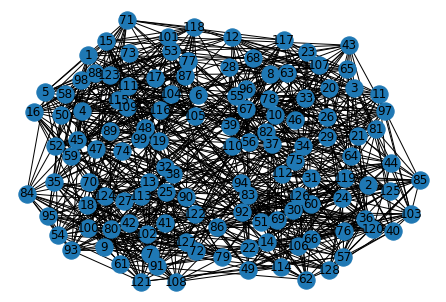

In [ ]:
nx.draw(G_lfr,with_labels=True)

In [ ]:
B_lfr.shape

(128, 128)

In [ ]:
B_lfr=np.asarray(B_lfr,dtype=np.float64)
inputs=torch.from_numpy(B_lfr)
targets=torch.from_numpy(B_lfr)
print(inputs.shape)

torch.Size([128, 128])


In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [ ]:
train_ds = TensorDataset(inputs, targets)

In [ ]:
len(train_ds)

128

In [ ]:
def givetrain(inputs,targets):  
  train_ds = TensorDataset(inputs, targets)
  train_dl=DataLoader(train_ds,batch_size=len(train_ds))
  return train_dl

In [ ]:
for xb, yb in givetrain(inputs,targets):
    print(xb)
    print(yb)
    break

tensor([[-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        [-0.1250, -0.1250, -0.1250,  ...,  0.8750, -0.1250, -0.1250],
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        ...,
        [-0.1250,  0.8750, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250,  0.8750],
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250,  0.8750, -0.1250]],
       dtype=torch.float64)
tensor([[-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        [-0.1250, -0.1250, -0.1250,  ...,  0.8750, -0.1250, -0.1250],
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        ...,
        [-0.1250,  0.8750, -0.1250,  ..., -0.1250, -0.1250, -0.1250],
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250, -0.1250,  0.8750],
        [-0.1250, -0.1250, -0.1250,  ..., -0.1250,  0.8750, -0.1250]],
       dtype=torch.float64)


In [ ]:
class AE(nn.Module):
    def __init__(self,in_layers,hidden_layers):
        super().__init__()
        # Encoder
        self.encoder_hidden_layer = nn.Linear(
            in_features=in_layers, out_features=hidden_layers
        )
        self.encoder_output_layer = nn.Linear(
            in_features=hidden_layers, out_features=hidden_layers
        )
        # DEcoder
        self.decoder_hidden_layer= nn.Linear(
            in_features=hidden_layers, out_features=hidden_layers
        )
        self.decoder_output_layer = nn.Linear(
            in_features=hidden_layers, out_features=in_layers
        )

    def forward(self, features):
        activation = self.encoder_hidden_layer(features)
        activation = torch.tanh(activation)
        # activation = nn.Dropout(p=0.01)(activation)
        code = self.encoder_output_layer(activation)
        code = torch.tanh(code)
        # code = nn.Dropout(p=0.01)(code)
        encoder=code
        activation = self.decoder_hidden_layer(code)
        activation = torch.tanh(activation)
        # activation = nn.Dropout(p=0.01)(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.tanh(activation)
        return encoder,reconstructed

In [ ]:
epochs = 1000
learning_rate = 1e-3

In [ ]:
#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model1 = AE(hidden_layers=64,in_layers=128).to(device)
model2=AE(hidden_layers=32,in_layers=64).to(device)
model3=AE(hidden_layers=16,in_layers=32).to(device)
# create an optimizer object
# Adam optimizer with learning rate 1e-3
optimizer1 = optim.Adam(model1.parameters(), lr=learning_rate)
optimizer2 = optim.Adam(model2.parameters(), lr=learning_rate)
optimizer3 = optim.Adam(model3.parameters(), lr=learning_rate)

# mean-squared error loss
def loss_func(input,target):
  return F.mse_loss(input,target)
print(model2)

AE(
  (encoder_hidden_layer): Linear(in_features=64, out_features=32, bias=True)
  (encoder_output_layer): Linear(in_features=32, out_features=32, bias=True)
  (decoder_hidden_layer): Linear(in_features=32, out_features=32, bias=True)
  (decoder_output_layer): Linear(in_features=32, out_features=64, bias=True)
)


In [ ]:
def train_model(epochs,train_dl,model,optimizer):
  enc,out=0,0
  for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_dl:
      # reshape mini-batch data to [N, 784] matrix
      # load it to the active device
      # batch_features = batch_features.view(-1, 784).to(device)
      
      # reset the gradients back to zero
      # PyTorch accumulates gradients on subsequent backward passes
        # optimizer.zero_grad()
        optimizer.zero_grad()
        # compute reconstructions
        encoder,outputs = model(batch_features.float())
        # out=outputs
        outputs=outputs.double()
        # compute training reconstruction loss
        train_loss = loss_func(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        enc=encoder
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
        # enc=encoder  
    # compute the epoch training loss
    loss = loss / len(train_dl)
    
    # display the epoch training loss
    print("epoch : {}/{}, recon loss = {:.8f}".format(epoch + 1, epochs, loss))
  return(enc)

In [ ]:
def train_model_new(epochs,train_dl,model,optimizer):
  enc,out=0,0
  for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_dl:
      # reshape mini-batch data to [N, 784] matrix
      # load it to the active device
      # batch_features = batch_features.view(-1, 784).to(device)
      
      # reset the gradients back to zero
      # PyTorch accumulates gradients on subsequent backward passes
        # optimizer.zero_grad()
        optimizer.zero_grad()
        # compute reconstructions
        encoder,outputs = model(batch_features)
        # out=outputs
        outputs=outputs
        # compute training reconstruction loss
        train_loss = loss_func(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        enc=encoder
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
        # enc=encoder  
    # compute the epoch training loss
    loss = loss / len(train_dl)
    
    # display the epoch training loss
    print("epoch : {}/{}, recon loss = {:.8f}".format(epoch + 1, epochs, loss))
  return(enc)

In [ ]:
train_dl=givetrain(inputs,targets)

encoder=train_model(300,train_dl,model1,optimizer1)
train_dl=givetrain(encoder.detach(),encoder.detach())
print(encoder.detach().shape)

encoder=train_model_new(200,train_dl,model2,optimizer2)
train_dl=givetrain(encoder.detach(),encoder.detach())
print(encoder.detach().shape)

encoder=train_model_new(300,train_dl,model3,optimizer3)
train_dl=givetrain(encoder.detach(),encoder.detach())
print(encoder.detach().shape)

epoch : 1/300, recon loss = 0.11636847
epoch : 2/300, recon loss = 0.11465621
epoch : 3/300, recon loss = 0.11307962
epoch : 4/300, recon loss = 0.11161065
epoch : 5/300, recon loss = 0.11022379
epoch : 6/300, recon loss = 0.10889664
epoch : 7/300, recon loss = 0.10761013
epoch : 8/300, recon loss = 0.10634855
epoch : 9/300, recon loss = 0.10509951
epoch : 10/300, recon loss = 0.10385398
epoch : 11/300, recon loss = 0.10260622
epoch : 12/300, recon loss = 0.10135375
epoch : 13/300, recon loss = 0.10009716
epoch : 14/300, recon loss = 0.09883969
epoch : 15/300, recon loss = 0.09758663
epoch : 16/300, recon loss = 0.09634446
epoch : 17/300, recon loss = 0.09511990
epoch : 18/300, recon loss = 0.09391914
epoch : 19/300, recon loss = 0.09274751
epoch : 20/300, recon loss = 0.09160941
epoch : 21/300, recon loss = 0.09050847
epoch : 22/300, recon loss = 0.08944755
epoch : 23/300, recon loss = 0.08842835
epoch : 24/300, recon loss = 0.08745092
epoch : 25/300, recon loss = 0.08651324
epoch : 2

In [ ]:
B_lfr_X=encoder.detach().numpy()

In [ ]:
print(type(B_lfr_X),B_lfr_X)

<class 'numpy.ndarray'> [[ 0.25757354  0.7047247   0.45952812 ... -0.2958926  -0.1956625
  -0.06164532]
 [-0.7963663   0.29103205 -0.50034755 ... -0.1967575  -0.32616666
   0.24820757]
 [-0.17089985 -0.14053127 -0.6088297  ...  0.31162587 -0.33008733
   0.25209787]
 ...
 [ 0.49380055  0.30644956 -0.25307634 ... -0.0062561   0.2335689
   0.26245934]
 [ 0.6111233  -0.55522543  0.00951972 ... -0.33715266  0.13735542
   0.32956478]
 [ 0.1783924  -0.23293312  0.00961776 ... -0.40006098  0.24713613
   0.5172247 ]]


In [ ]:
kmeans = KMeans(init='k-means++',n_clusters=4,random_state=1253)
kmeans.fit(B_lfr_X)
X_ae = kmeans.labels_

c_groups=[]
c_attributes = nx.get_node_attributes(G_lfr,'value')
for i, val in enumerate(c_attributes.values()):
    c_groups.append(val)
        
X_gt = np.array(c_groups)
print(X_ae)
print(X_gt)
metrics.normalized_mutual_info_score(X_gt, X_ae, average_method='arithmetic')

[3 1 0 0 3 3 2 3 2 0 0 0 2 1 3 3 3 2 3 0 0 1 0 1 2 0 2 0 2 1 1 2 3 0 2 1 1
 2 0 2 2 2 0 1 3 3 2 3 1 3 1 3 0 2 0 0 1 0 3 1 2 1 0 0 3 1 0 0 1 2 3 2 1 2
 0 1 3 0 2 2 0 0 1 2 1 1 3 2 2 2 2 1 2 1 2 0 0 2 3 2 3 2 1 3 0 1 0 2 0 0 0
 1 2 1 2 3 0 0 1 1 2 2 3 2 1 1 2 1]
[1 4 2 1 1 1 3 2 3 2 2 2 3 4 1 1 1 3 1 2 2 4 2 4 3 2 3 2 2 4 4 3 2 2 3 4 4
 3 2 4 3 3 2 4 1 2 3 1 4 1 4 1 1 3 2 2 4 1 1 4 3 4 2 2 2 4 2 2 4 3 1 3 1 3
 2 4 1 2 3 3 2 2 4 3 4 4 1 1 1 3 3 4 3 4 3 2 2 1 1 3 1 3 4 1 1 4 2 3 1 2 1
 4 3 4 1 1 2 1 4 4 3 3 1 3 4 4 3 4]


0.6971345852350782

In [ ]:
max=0
index_max=0
for value in range(1,10000):
    kmeans = KMeans(init='k-means++',n_clusters=4,random_state=value)
    kmeans.fit(B_lfr_X)
    X_ae = kmeans.labels_

    c_groups=[]
    c_attributes = nx.get_node_attributes(G_lfr,'value')
    for i, val in enumerate(c_attributes.values()):
        c_groups.append(val)
            
    X_gt = np.array(c_groups)
    temp=metrics.normalized_mutual_info_score(X_gt, X_ae, average_method='arithmetic')
    if(temp>max):
        max=temp
        index_max=value
    print("Epoch:{}".format(value),index_max,max)

Streaming output truncated to the last 5000 lines.
Epoch:5001 1253 0.6971345852350782
Epoch:5002 1253 0.6971345852350782
Epoch:5003 1253 0.6971345852350782
Epoch:5004 1253 0.6971345852350782
Epoch:5005 1253 0.6971345852350782
Epoch:5006 1253 0.6971345852350782
Epoch:5007 1253 0.6971345852350782
Epoch:5008 1253 0.6971345852350782
Epoch:5009 1253 0.6971345852350782
Epoch:5010 1253 0.6971345852350782
Epoch:5011 1253 0.6971345852350782
Epoch:5012 1253 0.6971345852350782
Epoch:5013 1253 0.6971345852350782
Epoch:5014 1253 0.6971345852350782
Epoch:5015 1253 0.6971345852350782
Epoch:5016 1253 0.6971345852350782
Epoch:5017 1253 0.6971345852350782
Epoch:5018 1253 0.6971345852350782
Epoch:5019 1253 0.6971345852350782
Epoch:5020 1253 0.6971345852350782
Epoch:5021 1253 0.6971345852350782
Epoch:5022 1253 0.6971345852350782
Epoch:5023 1253 0.6971345852350782
Epoch:5024 1253 0.6971345852350782
Epoch:5025 1253 0.6971345852350782
Epoch:5026 1253 0.6971345852350782
Epoch:5027 1253 0.6971345852350782
Epoc